In [5]:
!pip install ImageDraw

  Could not find a version that satisfies the requirement ImageDraw (from versions: )
No matching distribution found for ImageDraw


In [2]:
# Imports necesarios
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
import librosa

In [14]:
#CARGAR DATOS DE ENTRENAMIENTO
def parse():
    categories_dictt = {
        '_000': [1,0,0],
        '_010': [1,0,0],
        '_020': [1,0,0],
        '_030': [0,0,1],
        '_040': [0,1,0],
        '_050': [0,1,0],
        '_060': [0,1,0],
        '_070': [0,1,0],
        '_080': [0,1,0],
        '_090': [0,1,0],
        '_100': [0,1,0]
    }
    categories_dict = {
        '_000': '0',
        '_010': '1',
        '_020': '2',
        '_030': '3',
        '_040': '4',
        '_050': '5',
        '_060': '6',
        '_070': '7',
        '_080': '8',
        '_090': '9',
        '_100': '10'
    }
    data = []
    categories = []
    Aaudio = []
    Aprocentage = []
    ruta="to-category-audios"
    porcentages = os.listdir("./{}/".format(ruta))
    for porcentage in porcentages:
        audios = os.listdir("./{}/{}".format(ruta,porcentage))
        for audio in audios:
            X, sample_rate = librosa.load("./{}/{}/{}".format(ruta,porcentage,audio), res_type='kaiser_fast')
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
            data.append(mfccs)
            Aprocentage.append(porcentage)
            Aaudio.append(audio)
            categories.append(categories_dict[porcentage])
    #return scaler.fit_transform(np.array(data)), np.array(categories)
    return np.array(Aaudio),np.array(Aprocentage),np.array(data), np.array(categories)

In [15]:
audio,procentage,features,labels = parse()

In [16]:
df = pd.DataFrame({'audio':audio,'procentage':procentage,'labels':labels})

In [17]:
df.groupby('labels').size()

labels
0     801
1     608
10    210
2     754
3     787
4     825
5     584
6     602
7     511
8     590
9     502
dtype: int64

/Users/exxact/Documents/abastible/.env/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


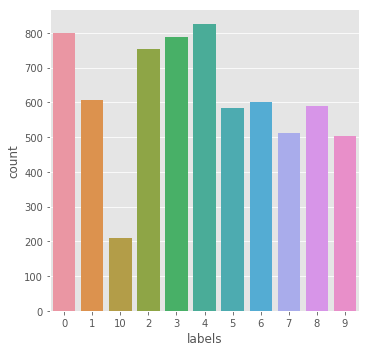

In [18]:
sb.factorplot('labels',data=df,kind="count", aspect=1)